Chuyển đổi hình thái học  
**Mục tiêu**  
Trong chương này, chúng ta sẽ tìm hiểu các phép toán hình thái học khác nhau như Co (Erosion), Giãn nở (Dilation), Mở (Opening), Đóng (Closing), v.v.  
Chúng ta sẽ xem các hàm khác nhau như: `cv2.erode()`, `cv2.dilate()`, `cv2.morphologyEx()` v.v.

**Lý thuyết**  
Chuyển đổi hình thái học là một số phép toán đơn giản dựa trên hình dạng của hình ảnh. Thông thường, nó được thực hiện trên hình ảnh nhị phân. Nó cần hai đầu vào: một là hình ảnh gốc, và cái thứ hai được gọi là phần tử cấu trúc hoặc kernel, quyết định bản chất của phép toán. Hai phép toán hình thái cơ bản là Co (Erosion) và Giãn nở (Dilation). Sau đó, các biến thể của chúng như Mở (Opening), Đóng (Closing), Gradient, v.v. cũng sẽ được áp dụng. Chúng ta sẽ lần lượt xem xét chúng với sự trợ giúp của hình ảnh sau:

**Hình ảnh đầu vào**  
1. **Co**  
Ý tưởng cơ bản của phép co giống như co đất, nó làm mòn đi các ranh giới của đối tượng tiền cảnh (luôn cố gắng giữ tiền cảnh màu trắng). Vậy nó làm gì? Kernel sẽ trượt qua hình ảnh (giống như trong tích chập 2D). Một pixel trong hình ảnh gốc (hoặc là 1 hoặc là 0) sẽ được coi là 1 chỉ khi tất cả các pixel dưới kernel đều là 1, nếu không thì nó sẽ bị co (tức là chuyển thành 0).

Do đó, tất cả các pixel gần biên sẽ bị loại bỏ tùy thuộc vào kích thước của kernel. Do đó, độ dày hoặc kích thước của đối tượng tiền cảnh sẽ giảm, hoặc đơn giản là vùng trắng trong hình ảnh sẽ giảm. Phép co hữu ích trong việc loại bỏ các nhiễu trắng nhỏ (như đã thấy trong chương về không gian màu), tách rời hai đối tượng kết nối, v.v.

Ở đây, làm ví dụ, tôi sẽ sử dụng một kernel 5x5 chứa đầy các giá trị 1. Hãy xem cách nó hoạt động:

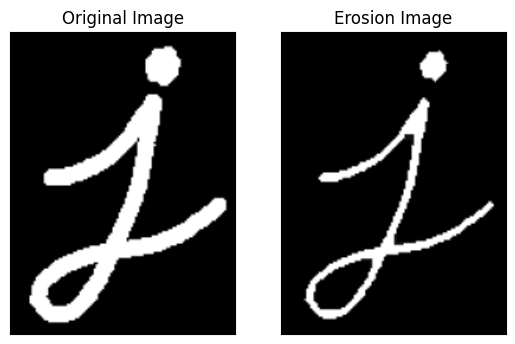

In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./Image/image1.png',0)
kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.show()



2. **Giãn nở (Dilation)**  
Giãn nở là phép toán ngược lại với xói mòn. Ở đây, một phần tử pixel sẽ là '1' nếu có ít nhất một pixel dưới kernel là '1'. Do đó, nó làm tăng vùng trắng trong hình ảnh hoặc kích thước của đối tượng tiền cảnh tăng lên. Thông thường, trong các trường hợp như loại bỏ nhiễu, xói mòn được theo sau bởi giãn nở. Vì xói mòn loại bỏ các nhiễu trắng nhưng cũng làm co nhỏ đối tượng của chúng ta, nên chúng ta sử dụng giãn nở để khôi phục lại kích thước. Vì nhiễu đã bị loại bỏ, chúng sẽ không xuất hiện trở lại, nhưng diện tích đối tượng sẽ tăng lên. Phép giãn nở cũng hữu ích trong việc nối liền các phần bị đứt đoạn của một đối tượng.

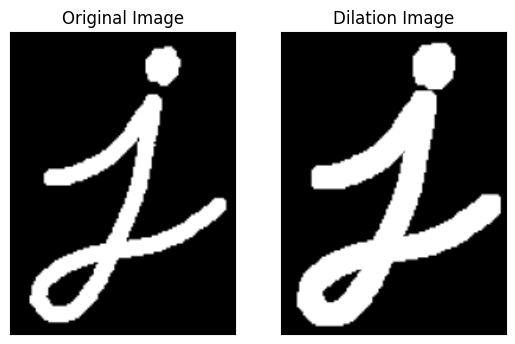

In [156]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap = 'gray')
plt.title('Dilation Image'), plt.xticks([]), plt.yticks([])
plt.show()

3. **Mở (Opening)**  
Mở là một thuật ngữ khác để chỉ phép Co (Erosion) sau đó là giãn nở (Dilation). Nó hữu ích trong việc loại bỏ nhiễu, như đã giải thích ở trên. Trong trường hợp này, chúng ta sử dụng hàm `cv2.morphologyEx()` để thực hiện phép toán này.

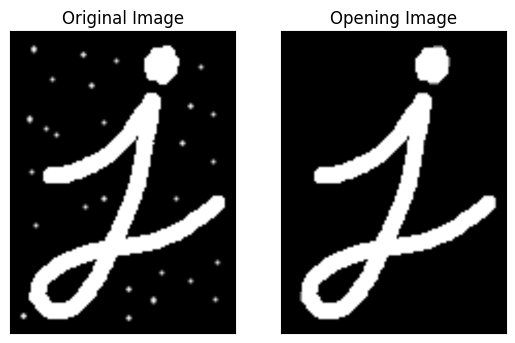

In [157]:
img = cv2.imread('./Image/image2.png',0)
kernel = np.ones((15,15),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap = 'gray')
plt.title('Opening Image'), plt.xticks([]), plt.yticks([])
plt.show()

4. **Đóng (Closing)**  
Đóng là phép toán ngược lại với Mở, tức là giãn nở (Dilation) được thực hiện trước, sau đó là xói mòn (Erosion). Nó hữu ích trong việc lấp đầy các lỗ nhỏ bên trong các đối tượng tiền cảnh hoặc loại bỏ các điểm đen nhỏ trên đối tượng.

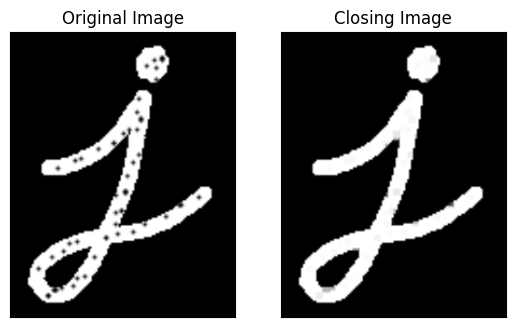

In [158]:
img = cv2.imread('./Image/image3.png',0)
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap = 'gray')
plt.title('Closing Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Some Morphological Algorithms

$$A \ominus B
$$


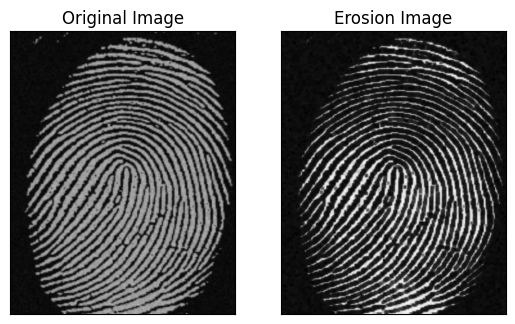

In [159]:
A = cv2.imread('./Image/image4.png',0)
# đảo ngược màu 
A = cv2.bitwise_not(A)
B = np.ones((5,5),np.uint8)
erosion = cv2.erode(A,B,iterations = 1)
plt.subplot(121),plt.imshow(A,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.show()


$$(A \ominus B) \oplus B = A \cdot B$$

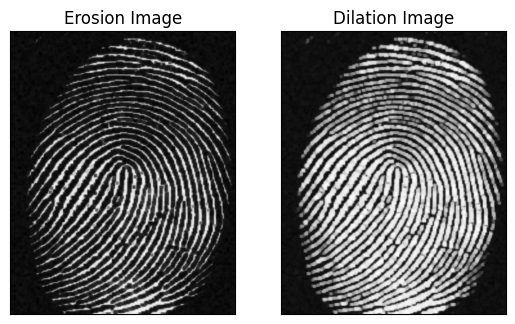

In [160]:
# erosion
dilation = cv2.dilate(erosion,B,iterations = 1)
plt.subplot(121),plt.imshow(erosion,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap = 'gray')
plt.title('Dilation Image'), plt.xticks([]), plt.yticks([])
plt.show()

$$(A \cdot B) \oplus B
$$

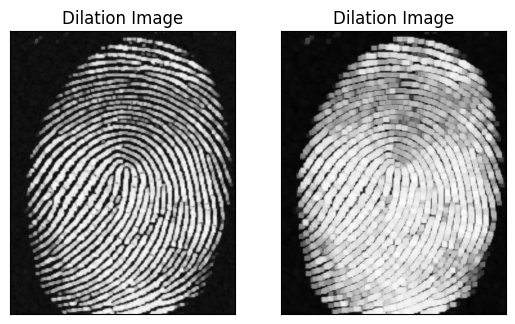

In [161]:
dilation1 = cv2.dilate(dilation,B,iterations = 1)
plt.subplot(121),plt.imshow(dilation,cmap = 'gray')
plt.title('Dilation Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation1,cmap = 'gray')
plt.title('Dilation Image'), plt.xticks([]), plt.yticks([])
plt.show()


$$\left[(A \cdot B) \oplus B\right] \ominus B = (A \cdot B) \cdot B
$$

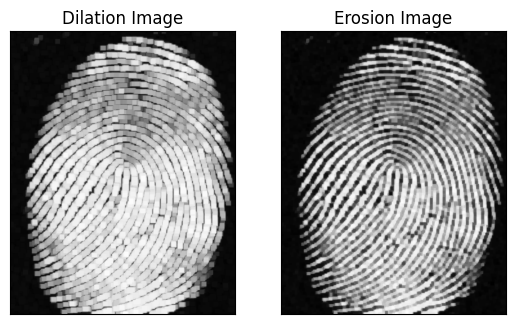

In [162]:
erosion1 = cv2.erode(dilation1,B,iterations = 1)
plt.subplot(121),plt.imshow(dilation1,cmap = 'gray')
plt.title('Dilation Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion1,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Boundary of a set, A, can be found by
$$ A - (A \ominus B) $$

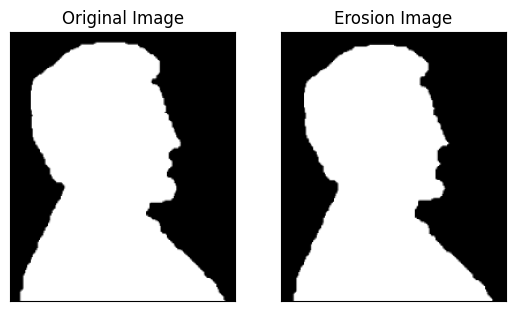

In [163]:
img = cv2.imread('./Image/image5.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.show()


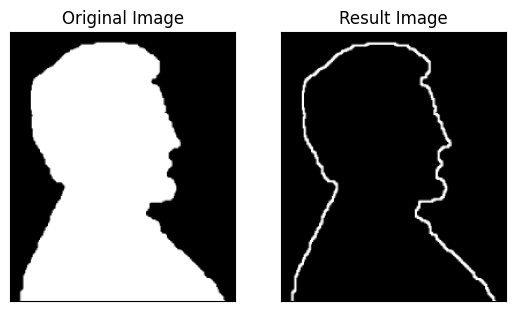

In [164]:
img2 = cv2.imread('./Image/image5.png',0)

result = cv2.subtract(img2,erosion)
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result,cmap = 'gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()